In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import seaborn.objects as so

In [2]:
df = pd.read_csv("../Data/private2.csv", index_col=0)

In [3]:
df['UACE YEAR'] = df['UACE YEAR'].astype('int64')

In [4]:
df

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL
0,23APF412304454141015,U0391,U0391/673,LUKABWE DOUGLAS MARK,M,2022,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2,Very Good,"ST.JOSEPH'S S S, NAGGALAMA"
1,23APF345674424112360,U1249,U1249/532,LULE ISAAC,M,2022,40.0,MPIGI,ACC,BSC. Accounting (EVE),41.1,Very Good,KINAAWA HIGH SCHOOL
2,23APF1361730063122187,U0459,U0459/676,HAULAH SULAIT BIIRA,F,2022,21.0,KASESE,ACC,BSC. Accounting (EVE),40.6,Very Good,KAWEMPE MUSLIM SS
3,23APF519647933132646,U1611,U1611/887,NAMBALYE EVELYNE,F,2022,33.0,MASAKA,ACC,BSC. Accounting (EVE),38.8,Good,OURLADY OF AFRICA SS NAMILYANGO
4,23APF1481620160129238,U0083,U0083/555,KEMIGISHA RUSIA,F,2022,65.0,IBANDA,ACC,BSC. Accounting (EVE),38.4,Good,IMMACULATE HEART GIRLS SCHOOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,23APF727648568141557,U0017,U0017/548,KIZZA VANESSA ITRONCE,F,2022,17.0,KAMULI,VET,B. Veterinary Medicine,41.8,Very Good,IGANGA SECONDARY SCHOOL
14911,23APF963075058135059,U0033,U0033/581,OTIM DANIEL,M,2022,31.0,LIRA,VET,B. Veterinary Medicine,41.7,Very Good,"ST MARY'S COLLEGE, KISUBI"
14912,23APF1618205309130850,U0077,U0077/736,MUKETI JOVIA,F,2022,74.0,MARACHA,VET,B. Veterinary Medicine,41.6,Very Good,GOMBE SECONDARY SCHOOL
14913,23APF575513287117711,U0077,U0077/564,AWOR REBECCA,F,2022,31.0,LIRA,VET,B. Veterinary Medicine,40.4,Very Good,GOMBE SECONDARY SCHOOL


In [5]:
# Total Weight analysis
totalWeight_cat = df.groupby(['WEIGHT RANGE'])['INDEX NO'].count()

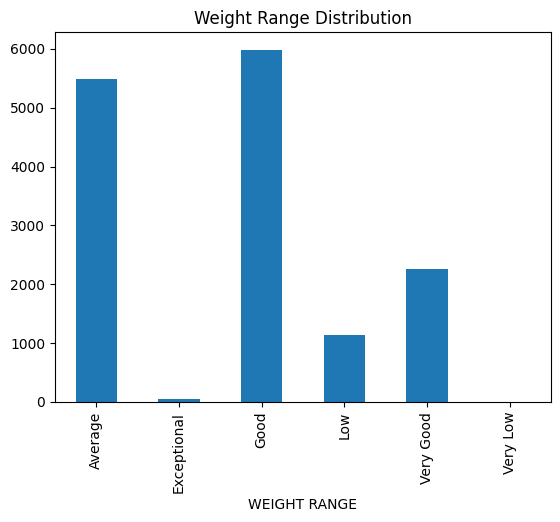

In [6]:
totalWeight_cat.plot(
    title="Weight Range Distribution",
    y="Student",
    
    kind="bar");

In [7]:
# Average Total Weight vs Gender
df.groupby(['GENDER'])['TOTAL WEIGHT'].mean()

GENDER
F    31.686487
M    31.054889
Name: TOTAL WEIGHT, dtype: float64

In [8]:
# Total Weight Vs UACE Year
yearTotalWeight = df.groupby(['UACE YEAR'])['TOTAL WEIGHT'].mean()
yearTotalWeight

UACE YEAR
1995    21.650000
1996    32.033333
1999    20.866667
2000    32.500000
2001    32.500000
2002    22.520000
2003    26.050000
2004    24.150000
2005    29.352381
2006    26.627273
2007    31.911111
2008    29.335000
2009    30.114286
2010    32.034783
2011    30.168966
2012    34.700000
2013    28.612500
2014    30.438462
2015    28.894118
2016    28.629091
2017    28.022667
2018    29.400000
2019    28.439485
2020    28.658130
2022    31.627146
Name: TOTAL WEIGHT, dtype: float64

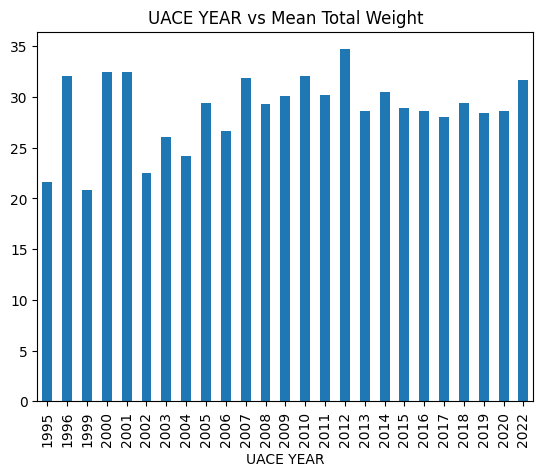

In [9]:
df.groupby(['UACE YEAR'])['TOTAL WEIGHT'].mean().plot(
    title="UACE YEAR vs Mean Total Weight",
    y="Weight",
    kind="bar"
);
plt.savefig("../Data/yearTotalWeight.png");

In [10]:
# Course and Total Weight
df.groupby(['COURSE NAME'])['INDEX NO'].count().sort_values(
    ascending=False
).head()

COURSE NAME
Bachelor of Arts with Education              836
Bachelor of Business Administration          800
Bachelor of Business Administration (EVE)    783
Bachelor of Commerce                         565
B. International Business                    490
Name: INDEX NO, dtype: int64

In [28]:
# Course and school
df.groupby(["COURSE NAME", "SCHOOL"])["INDEX NO"].count().head(50)

COURSE NAME                                    SCHOOL                          
B TRAVEL & TOURISM MGT, MBARARA (DAY)          AISHA GIRLS HIGH SCH., MBARARA      1
                                               ALLIANCE SECONDARY SCHOOL           1
                                               BISHOP MCALLISTER COL. KYOGERA      1
                                               BISHOP OGEZ H. SCHOOL, ISHAKA       1
                                               BUSOGA COLLEGE, MWIRI               1
                                               BUTSIBO S S                         1
                                               CENTRAL COLLEGE, MITYANA            1
                                               CITIZEN'S SECONDARY SCHOOL          1
                                               CODE HIGH SCHOOL                    1
                                               CRESTED HIGH SCHOOL, LUKAYA         1
                                               FOREST HILL COLLEGE    

In [12]:
# Schools with high admissions to STEM
def schoolProgAdmission(df, programme, n):
    admissions = df[df["COURSE NAME"] == programme].groupby(["COURSE NAME",
                                                        "SCHOOL"])["INDEX NO"].count().sort_values(
        ascending=False)
    admissionsCount = admissions
    top_n = admissions.head(n)
    return top_n

In [94]:
# Return list of top schools per program
def topSchoolsList(top_n):
    lst = []
    for x in top_n.index:
        lst.append(x[1])
    return lst

In [76]:
top_n = schoolProgAdmission(df, "BSC.(Civil Engineering)A", 10)

In [77]:
top_n

COURSE NAME               SCHOOL                        
BSC.(Civil Engineering)A  ST MARY'S SS  KITENDE             3
                          UGANDA MARTYRS S.S., NAMUGONGO    2
                          GAYAZA HIGH SCHOOL                1
                          KINAAWA HIGH SCHOOL               1
                          KING'S COLLEGE, BUDO              1
                          MENGO SECONDARY SCHOOL            1
                          ST.JOSEPH'S GIRLS, NSAMBYA        1
                          ST.MARY'S COLLEGE, LUGAZI         1
Name: INDEX NO, dtype: int64

In [111]:
# Schools with top admissions per program
def topSchools(df, n):
    topSchoolsByAdmissionList = []
    schools = df['SCHOOL'].dropna().unique()

    # schools
    # print(schools)
    
    programs = df['COURSE NAME'].unique()
    # programs = ["BSC.(Civil Engineering)A"]
    
    # programs
    # print(programs)
    # print(schoolProgAdmission(df, programs[0], n))

    # print(topSchoolsList(schoolProgAdmission(df, programs[0], n)))

    # schools with top Admissions to list
    # for school in schools:
    for program in programs:
        topSchoolsByAdmissionList.extend(topSchoolsList(schoolProgAdmission(df, program, n)))

    # Count occurrences
    schoolOccurrences = {}
    for school in set(topSchoolsByAdmissionList):
        schoolOccurrences[school] = topSchoolsByAdmissionList.count(school)
    # print(schoolOccurrences)
    return schoolOccurrences
topSchools(df, 15)

{'TURKISH LIGHT ACADEMY': 1,
 'AGA KHAN HIGH SCHOOL': 2,
 'EBENEZER SECONDARY SCHOOL': 3,
 'RUKUNGIRI CENTRAL S. S.': 1,
 'BRIGHT TRUST SECONDARY SCHOOL  KYENGERA': 1,
 'MITYANA STANDARD SEC.SCH.': 3,
 'MENGO SECONDARY SCHOOL ANNEX': 46,
 'ARUA PUBLIC SCHOOL': 2,
 "ST.JOSEPH'S COLLEGE,NAMAGUNGA": 8,
 'GREAT AUBREY MEMORIAL COLLEGE': 1,
 "ST.PETER'S COLLEGE, TORORO": 2,
 'UBUNTU HILL SCHOOL': 4,
 'NEWCASTLE HIGH SCHOOL KASANGA': 1,
 'GOD MARK  HIGH SCHOOL': 2,
 'TRINITY COLLEGE, NABBINGO': 6,
 'ABIM SEC. SCHOOL': 1,
 'ENTEBBE  SECONDARY SCHOOL': 1,
 'KISOZI HIGH SCHOOL': 1,
 'BUGISU HIGH SCHOOL': 1,
 'GREENHILL ACADEMY, KAMPALA': 3,
 'BUGWERE HIGH SCHOOL': 1,
 'KITAGATA SECONDARY SCHOOL': 5,
 "KYEIZOBA  GIRLS' SEC. SCHOOL": 1,
 'KYAMBOGO COLLEGE SCHOOL': 8,
 'BUSIA TRUST S S': 2,
 "ST.PAUL'S COLLEGE, MBALE": 1,
 'OLD KAMPALA SECONDARY SCHOOL': 10,
 'KITGUM COMPREHENSIVE COLLEGE': 2,
 "BISHOP'S SEC. SCHOOL, MUKONO": 6,
 'BISHOP COMBONI COL., KAMBUGA': 4,
 'AMITY SECONDARY SCHOOL': 2,
 'U

In [160]:
dfTop10Schools = pd.DataFrame(data={"Schools": topSchools(df, 15).keys(), "Frequency": topSchools(df, 15).values()}, 
             index=np.arange(len(topSchools(df, 15)))).sort_values(by="Frequency",
                                                                  ascending=False).head(10)
dfTop10Schools.index = dfTop10Schools.Schools

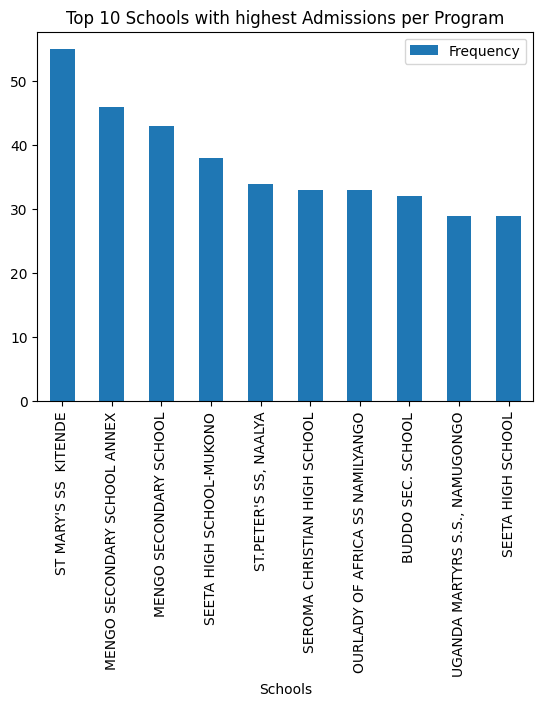

In [167]:
dfTop10Schools.drop(columns=["Schools"], axis=1).plot(
    title="Top 10 Schools with highest Admissions per Program",
    kind="bar");
plt.savefig("Top10Top10.png")

In [56]:
top_n

COURSE NAME            SCHOOL                                 
BSC. Accounting (EVE)  KAWEMPE MUSLIM SS                          4
                       MENGO SECONDARY SCHOOL ANNEX               3
                       MENGO SECONDARY SCHOOL                     3
                       OURLADY OF AFRICA SS NAMILYANGO            3
                       ST. KIZITO SS,  BUGOLOBI                   3
                       ST.BALIKUDEMBE S.S.S. KISOGA               3
                       HOLY CROSS LAKE VIEW SEC. SCHOOL, JINJA    2
                       NAMUGOONA PARENTS SCHOOL                   2
                       MADINAH ISLAMIC SS, NSANGI                 2
                       LUZIRA LAKESIDE COLLEGE                    2
Name: INDEX NO, dtype: int64

In [84]:
for x in top_n.index:
    print(x[1])

ST MARY'S SS  KITENDE
UGANDA MARTYRS S.S., NAMUGONGO
GAYAZA HIGH SCHOOL
KINAAWA HIGH SCHOOL
KING'S COLLEGE, BUDO
MENGO SECONDARY SCHOOL
ST.JOSEPH'S GIRLS, NSAMBYA
ST.MARY'S COLLEGE, LUGAZI
